In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Formating the plots display style

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.rcParams['legend.facecolor'] = 'none'
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['legend.labelspacing'] = 1

plt.rcParams['axes.facecolor'] = 'EAEAF2'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['grid.color'] = 'white'
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.minor.size'] = 0

# Modelo 1

In [3]:
class Carteira:
    def __init__(self, salario=1600, despesas=500, taxas=.1):
        self.salario = salario
        self.despesas = despesas
        self.taxas = taxas
    
    def ganho(self, t):
        return 12 * self.salario
    
    def gastos(self, t):
        return 12 * self.despesas
    
    def pagamentos(self, t):
        return self.taxas * self.ganho(t)
    
    def modelo(self, t):
        return self.ganho(t) - self.gastos(t) - self.pagamentos(t)
    
    def integrar(self, t_init, t_end, y0, h=0.001):
        N = int((t_end - t_init) / h)
        x = np.linspace(t_init, t_end, N)
        y = np.zeros(N)
        y[0] = y0
        for i in range(N-1):
            y[i+1] = y[i] + h * self.modelo(x[i])
        return x, y

In [4]:
cart1 = Carteira()
x, y = cart1.integrar(0, 100, 0)

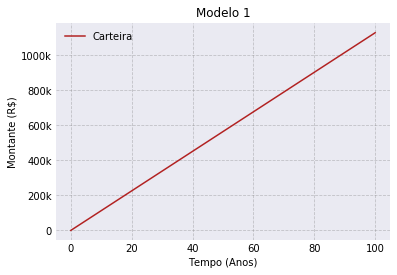

In [5]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, y, color='firebrick', label='Carteira')
ax.set_yticks([0, 200_000, 400_000, 600_000, 800_000, 1_000_000])
ax.set_yticklabels(['0', '200k', '400k', '600k', '800k', '1000k'])
ax.legend(loc='best')
ax.grid(linestyle='dashed', color='grey', alpha=.4)

ax.set_xlabel('Tempo (Anos)')
ax.set_ylabel('Montante (R\$)')
ax.set_title('Modelo 1')

plt.savefig('Modelo1.png', bbox_inches='tight', dpi=200)

# Modelo 1.1

In [6]:
class Carteira:
    def __init__(self, salario=1600, despesas=500, taxas=.1,
                aposentadoria=1000, atividade=18, descanso=70):
        self.salario = salario
        self.despesas = despesas
        self.taxas = taxas
        self.aposentadoria = aposentadoria
        self.atividade = atividade
        self.descanso = descanso
    
    def ganho(self, t):
        if t < self.atividade:
            return 0
        elif self.atividade <=  t < self.descanso:
            return 12 * self.salario
        else:
            return 12 * self.aposentadoria

    def gastos(self, t):
        if t < self.atividade:
            return 0
        else:
            return 12 * self.despesas
    
    def pagamentos(self, t):
        return self.taxas * self.ganho(t)
    
    def modelo(self, t):
        return self.ganho(t) - self.gastos(t) - self.pagamentos(t)
    
    def integrar(self, t_init, t_end, y0, h=0.001):
        N = int((t_end - t_init) / h)
        x = np.linspace(t_init, t_end, N)
        y = np.zeros(N)
        y[0] = y0
        for i in range(N-1):
            y[i+1] = y[i] + h * self.modelo(x[i])
        return x, y

def simulacao(carteira):
    x0, y0 = carteira.integrar(0, carteira.atividade, 0)
    x1, y1 = carteira.integrar(carteira.atividade, carteira.descanso, y0[-1])
    x2, y2 = carteira.integrar(carteira.descanso, 100, y1[-1])
    return np.concatenate((x0,x1,x2)), np.concatenate((y0,y1,y2))

In [7]:
cart2 = Carteira()
x, y = simulacao(cart2)

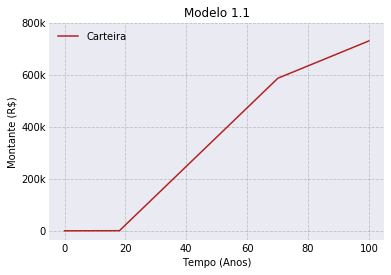

In [8]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, y, color='firebrick', label='Carteira')
ax.set_yticks([0, 200_000, 400_000, 600_000, 800_000])
ax.set_yticklabels(['0', '200k', '400k', '600k', '800k'])
ax.legend(loc='best')
ax.grid(linestyle='dashed', color='grey', alpha=.4)

ax.set_xlabel('Tempo (Anos)')
ax.set_ylabel('Montante (R\$)')
ax.set_title('Modelo 1.1')

plt.savefig('Modelo1-1.png', bbox_inches='tight', dpi=200)

# Modelo 2

In [9]:
class Carteira:
    def __init__(self, salario=1600, despesas=500, taxas=.1,
                aposentadoria=1000, atividade=18, descanso=70,
                alpha=120, beta=80):
        self.salario = salario
        self.despesas = despesas
        self.taxas = taxas
        self.aposentadoria = aposentadoria
        self.atividade = atividade
        self.descanso = descanso
        self.reajuste_salarial = alpha
        self.reajuste_despesas = beta
    
    def ganho(self, t):
        if t < self.atividade:
            return 0
        elif self.atividade <=  t < self.descanso:
            return 12 * (self.salario + self.reajuste_salarial\
                 * (t - self.atividade))
        else:
            return 12 * self.aposentadoria

    def gastos(self, t):
        if t < self.atividade:
            return 0
        else:
            return 12 * (self.despesas + self.reajuste_despesas\
                 * (t - self.atividade))
    
    def pagamentos(self, t):
        return self.taxas * self.ganho(t)
    
    def modelo(self, t):
        return self.ganho(t) - self.gastos(t) - self.pagamentos(t)
    
    def integrar(self, t_init, t_end, y0, h=0.001):
        N = int((t_end - t_init) / h)
        x = np.linspace(t_init, t_end, N)
        y = np.zeros(N)
        y[0] = y0
        for i in range(N-1):
            y[i+1] = y[i] + h * self.modelo(x[i])
        return x, y

def simulacao(carteira):
    x0, y0 = carteira.integrar(0, carteira.atividade, 0)
    x1, y1 = carteira.integrar(carteira.atividade, carteira.descanso, y0[-1])
    x2, y2 = carteira.integrar(carteira.descanso, 100, y1[-1])
    return np.concatenate((x0,x1,x2)), np.concatenate((y0,y1,y2))

In [10]:
cart3 = Carteira()
x, y = simulacao(cart3)

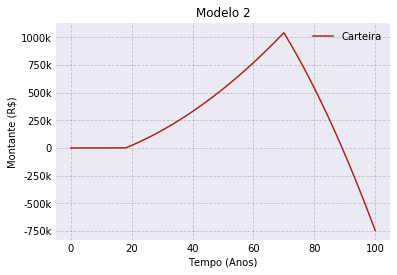

In [11]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, y, color='firebrick', label='Carteira')
ax.set_yticks([-250_000, -500_000, -750_000, 0, 250_000, 500_000, 750_000, 1_000_000])
ax.set_yticklabels(['-250k', '-500k', '-750k', 0, '250k', '500k', '750k', '1000k'])
ax.legend(loc='best')
ax.grid(linestyle='dashed', color='grey', alpha=.4)

ax.set_xlabel('Tempo (Anos)')
ax.set_ylabel('Montante (R\$)')
ax.set_title('Modelo 2')

plt.savefig('Modelo2.png', bbox_inches='tight', dpi=200)